# Proyecto 1 
## Ciencia de Datos con Python
#### Carlos Alfredo Rivera Yong 23008861

In [8]:
#Importaremos las librerias a utilizar
import numpy as npy
import pandas as pds
import seaborn as sbn
import matplotlib.pyplot as mpl

In [10]:
data = pds.DataFrame(npy.load("proyecto_training_data.npy"),columns=['SalePrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])


In [11]:
npy.random.shuffle(data.values)
N =int(0.8*len(data))
train = data.iloc[:N]
valid = data.iloc[N:]


In [12]:
data.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


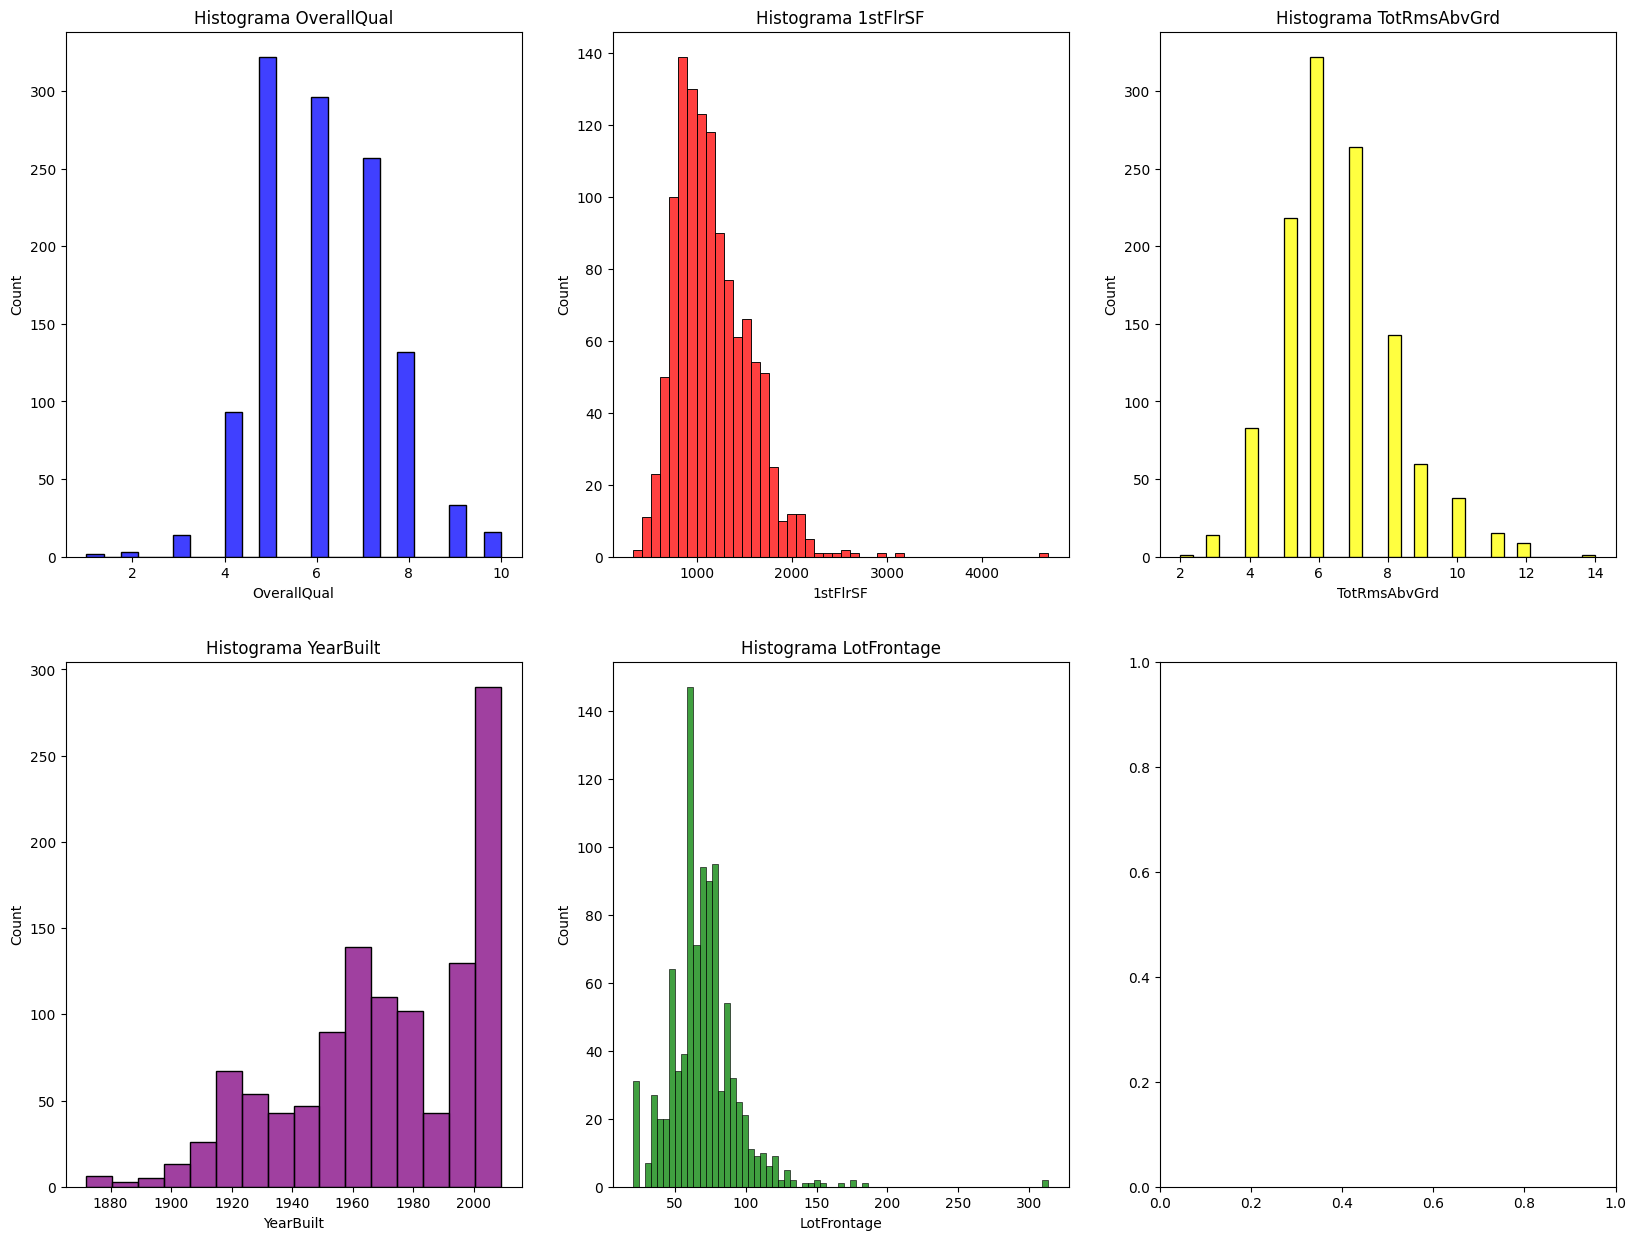

In [23]:
figura, ejes = mpl.subplots(nrows = 2,ncols = 3, figsize = (20,15))
sbn.histplot(ax=ejes[0][0],data=train["OverallQual"], color= "blue")
sbn.histplot(ax=ejes[0][1],data=train["1stFlrSF"], color= "red")
sbn.histplot(ax=ejes[0][2],data=train["TotRmsAbvGrd"], color= "yellow")
sbn.histplot(ax=ejes[1][0],data=train["YearBuilt"], color= "purple")
sbn.histplot(ax=ejes[1][1],data=train["LotFrontage"], color= "green")
ejes[0][0].set_title("Histograma OverallQual")
ejes[0][1].set_title("Histograma 1stFlrSF")
ejes[0][2].set_title("Histograma TotRmsAbvGrd")
ejes[1][0].set_title("Histograma YearBuilt")
ejes[1][1].set_title("Histograma LotFrontage")
mpl.show()

C:\Users\carlo\AppData\Local\Temp\ipykernel_18156\544338849.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figura.show()


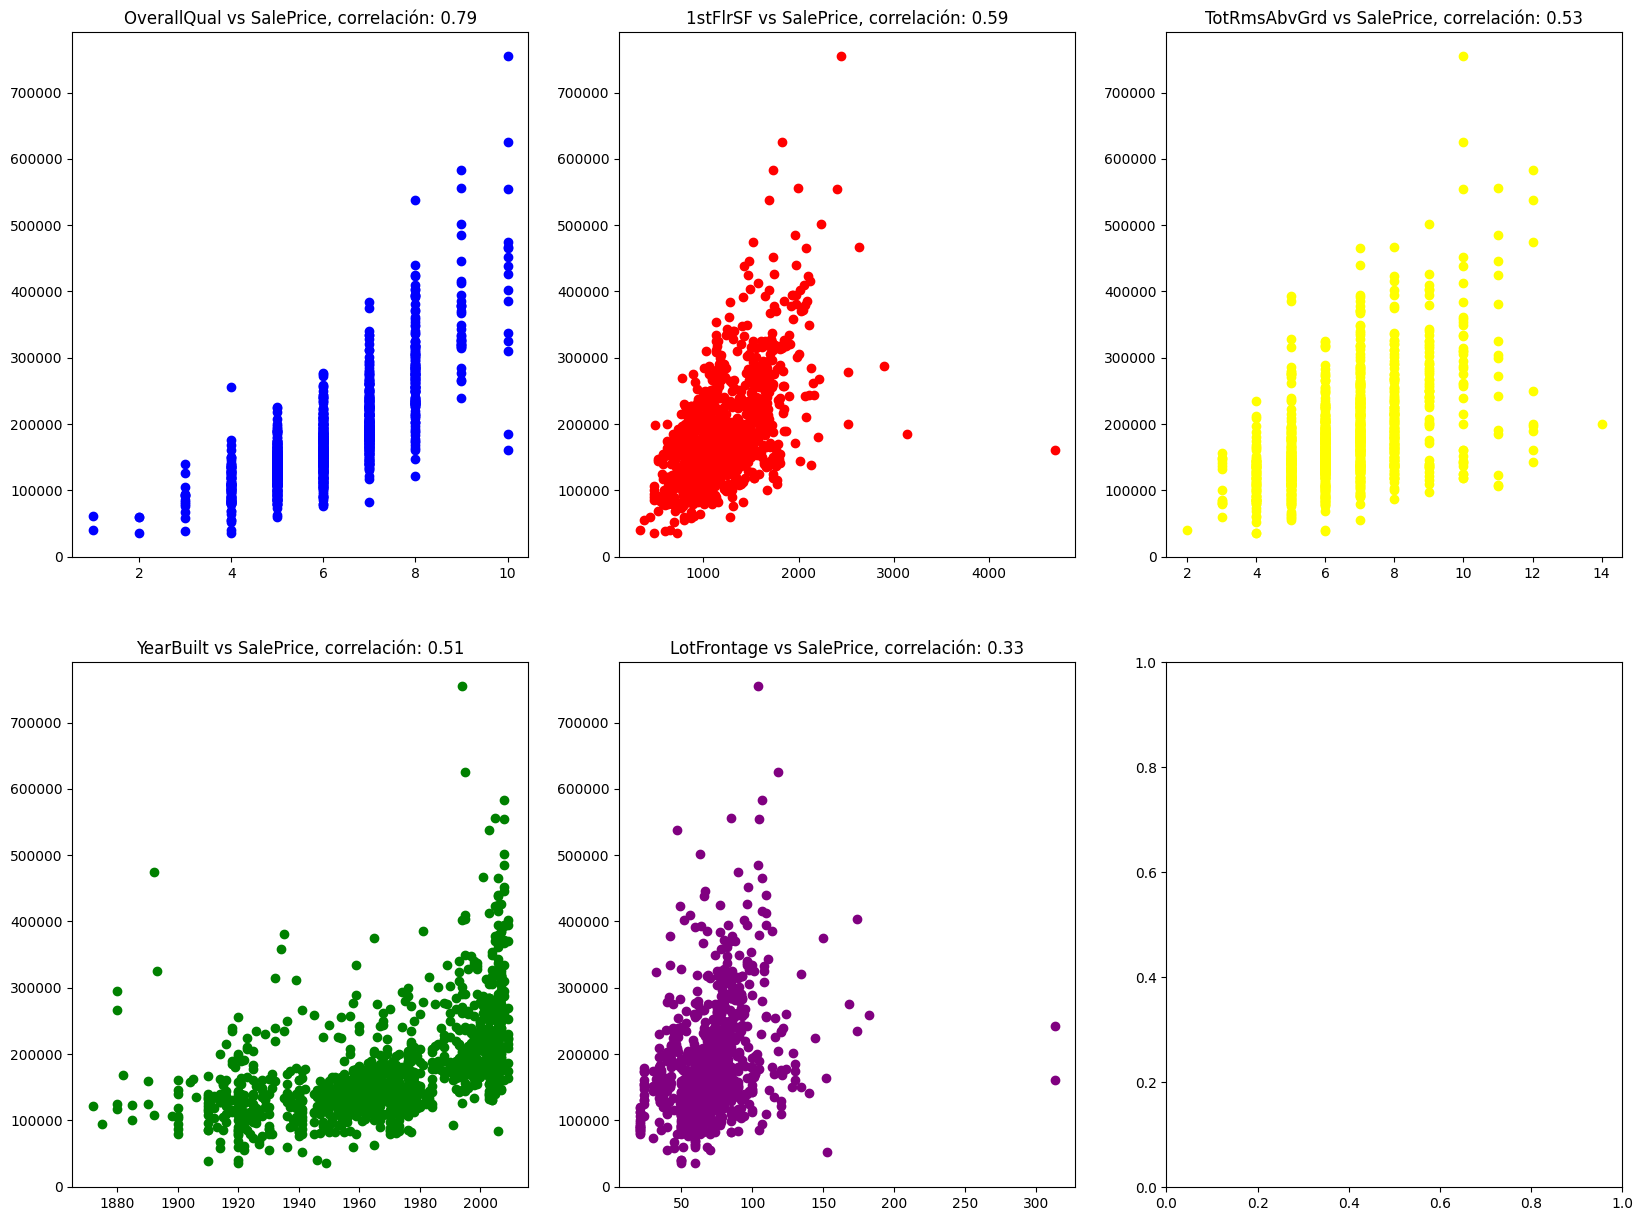

In [30]:
cor1 = train["SalePrice"].corr(train["OverallQual"])
cor2 = train["SalePrice"].corr(train["1stFlrSF"])
cor3 = train["SalePrice"].corr(train["TotRmsAbvGrd"])
cor4 = train["SalePrice"].corr(train["YearBuilt"])
cor5 = train["SalePrice"].corr(train["LotFrontage"])

figura, ejes = mpl.subplots(nrows = 2,ncols = 3, figsize = (20,15))
ejes[0][0].scatter(x=train["OverallQual"], y=train["SalePrice"],color= "blue")
ejes[0][1].scatter(x=train["1stFlrSF"], y=train["SalePrice"],color= "red")
ejes[0][2].scatter(x=train["TotRmsAbvGrd"], y=train["SalePrice"],color= "yellow")
ejes[1][0].scatter(x=train["YearBuilt"], y=train["SalePrice"],color= "green")
ejes[1][1].scatter(x=train["LotFrontage"], y=train["SalePrice"],color= "purple")
ejes[0][0].set_title(f"OverallQual vs SalePrice, correlación: {round(cor1,2)}")
ejes[0][1].set_title(f"1stFlrSF vs SalePrice, correlación: {round(cor2,2)}")
ejes[0][2].set_title(f"TotRmsAbvGrd vs SalePrice, correlación: {round(cor3,2)}")
ejes[1][0].set_title(f"YearBuilt vs SalePrice, correlación: {round(cor4,2)}")
ejes[1][1].set_title(f"LotFrontage vs SalePrice, correlación: {round(cor5,2)}")
figura.show()

In [62]:
def regresion(x,y,epochs,imprimir_error_cada,alpha):

    models = []
    errors = []
    coefs = [0,0]
    x = npy.array([x,npy.ones(len(x))])
    for i in range(epochs):
        y1= npy.dot(coefs,x)
        error= (1/2*len(y))*(npy.sum(npy.square(y-y1)))
        if (i % imprimir_error_cada == 0):
            print(f'El error en la iteración {i} es {error}')
        coefs = coefs+(1/len(y)*(npy.dot((y-y1),x.T)))*alpha
        models.append(coefs)
        errors.append(error)
    return models, errors           

        

In [63]:
def graph(errors):
    mpl.plot(errors,color="red")
    mpl.title("Curva de error")
    mpl.show()

In [64]:
def model_graph(x,y,models,models_cada):
    mpl.figure(figsize=(10,15))
    mpl.scatter(x,y,color="red")
    for i,model in enumerate(models):
        if (i%models_cada==0):
            x_line = npy.linspace(0, max(x),1000)
            y_line = npy.dot(model,npy.array([x_line,npy.ones(len(x_line))]))
            mpl.plot(x_line,y_line,color="blue")
    mpl.show()        
        

El error en la iteración 0 es 2.642956918695191e+16
El error en la iteración 100 es 1.2916471294403438e+16
El error en la iteración 200 es 6858368732023525.0
El error en la iteración 300 es 4142347762476987.5
El error en la iteración 400 es 2924585281466068.0
El error en la iteración 500 es 2378493653701444.5
El error en la iteración 600 es 2133512863215368.2
El error en la iteración 700 es 2023520505507669.0
El error en la iteración 800 es 1974043749945635.5
El error en la iteración 900 es 1951696356225030.5


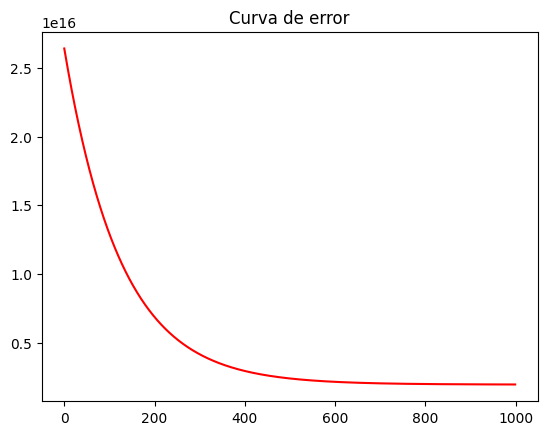

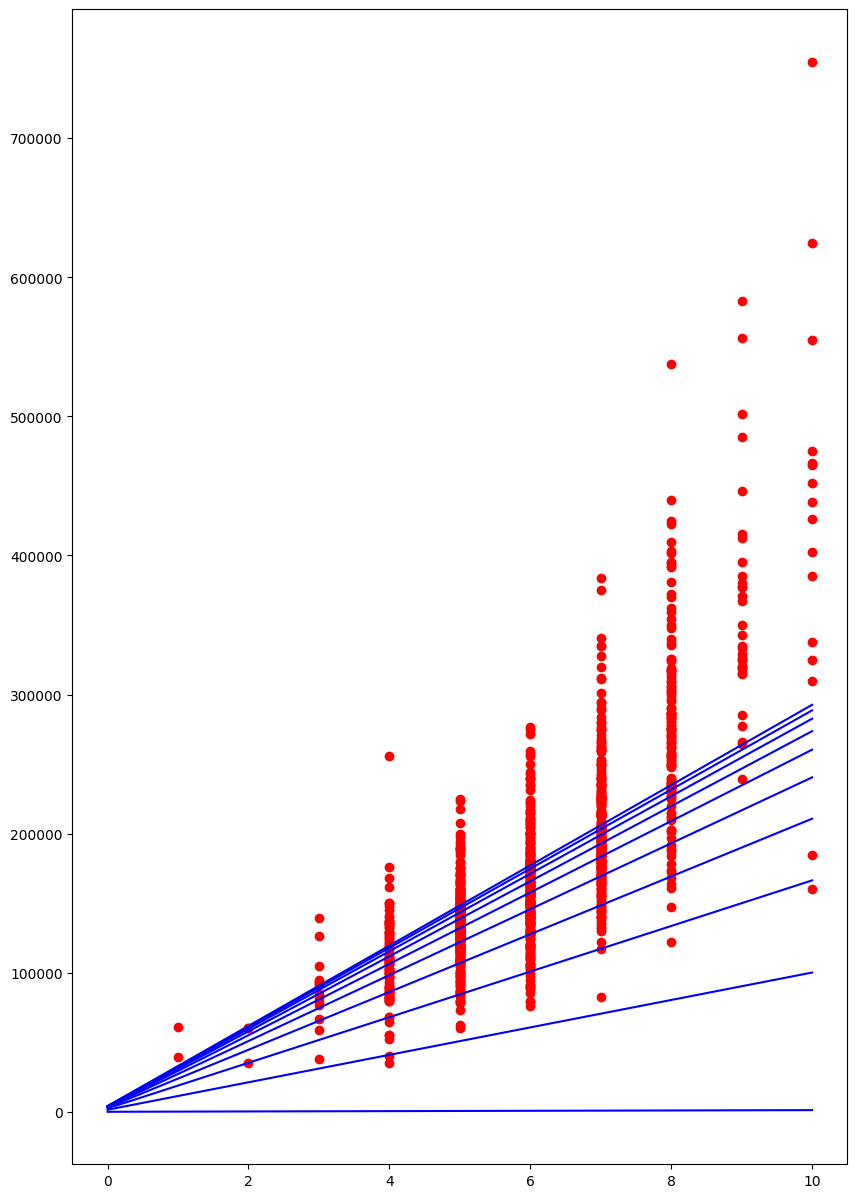

In [65]:
models,error = regresion(train["OverallQual"],train["SalePrice"],epochs=1000,imprimir_error_cada=100,alpha=0.0001)
graph(error)
model_graph(train["OverallQual"],train["SalePrice"],models_cada=100,models=models)


El error en la iteración 0 es 2.642956918695191e+16
El error en la iteración 10 es 2.027959139595499e+16
El error en la iteración 20 es 1.5734363650910558e+16
El error en la iteración 30 es 1.2375149039533806e+16
El error en la iteración 40 es 9892474146463980.0
El error en la iteración 50 es 8057618283351778.0
El error en la iteración 60 es 6701542202615943.0
El error en la iteración 70 es 5699315066433888.0
El error en la iteración 80 es 4958604978737809.0
El error en la iteración 90 es 4411172750708833.5
El error en la iteración 100 es 4006585248305832.0
El error en la iteración 110 es 3707569153172685.5
El error en la iteración 120 es 3486577094167551.0
El error en la iteración 130 es 3323249798483645.5
El error en la iteración 140 es 3202540458674746.5
El error en la iteración 150 es 3113328519676219.0
El error en la iteración 160 es 3047395178570063.5
El error en la iteración 170 es 2998666213250253.5
El error en la iteración 180 es 2962652384278704.0
El error en la iteración 190

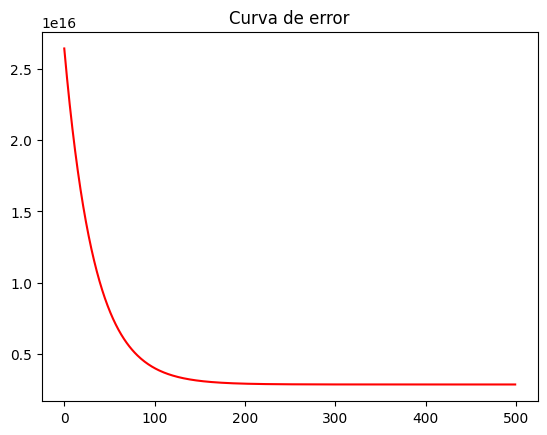

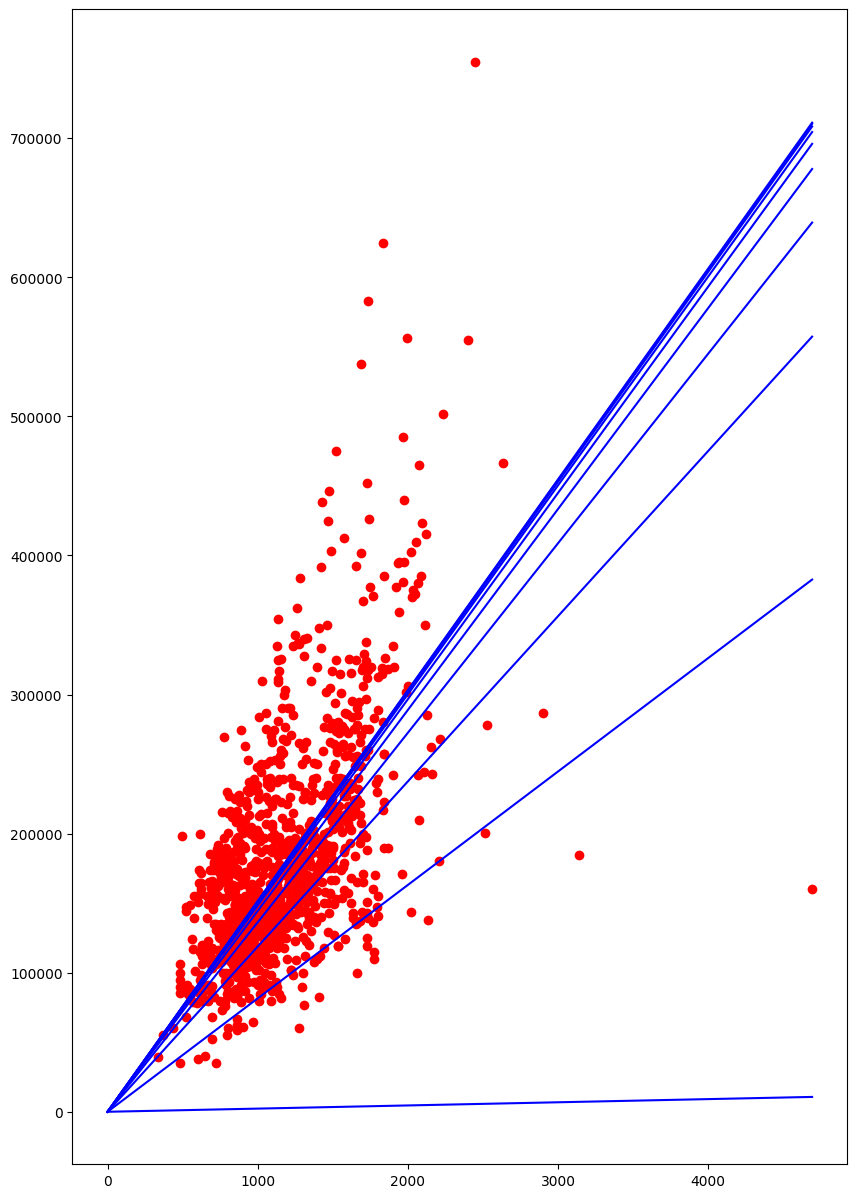

In [72]:
models,error = regresion(train["1stFlrSF"],train["SalePrice"],epochs=500,imprimir_error_cada=10,alpha=0.00000001)
graph(error)
model_graph(train["1stFlrSF"],train["SalePrice"],models_cada=50,models=models)

In [74]:
from sklearn.linear_model import LinearRegression 

In [77]:
regresion_x1 = LinearRegression().fit(npy.asarray(train["OverallQual"]).reshape(-1,1),npy.asarray(train["SalePrice"]))
regresion_x2 = LinearRegression().fit(npy.asarray(train["1stFlrSF"]).reshape(-1,1),npy.asarray(train["SalePrice"]))